Import libraries 

In [15]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Ahmed Esmail\Downloads\Rent.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
print(df.head())


   BHK         Size  Floor  Area Locality  City  Bathroom  N_11  N_12  N_13  \
0    2  1100.000000    454            220     4         2     0     0     1   
1    2   967.936049     14           1525     4         1     0     0     1   
2    2  1000.000000     14           1758     4         1     0     0     1   
3    2   967.936049     10            525     4         1     0     0     1   
4    2   850.000000     10           1888     4         1     0     1     0   

   N_14  N_15  N_16  N_17  N_18  N_19  N_20  N_21  N_22   Rent  
0     0     0     1     0     1     0     0     0     1  10000  
1     0     1     0     0     1     0     0     0     1  20000  
2     0     1     0     0     1     0     0     0     1  17000  
3     0     0     1     0     1     0     0     0     1  10000  
4     0     0     1     1     0     0     0     0     1   7500  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727 entries, 0 to 4726
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BHK            4727 non-null   int64  
 1   Size           4727 non-null   float64
 2   Floor          4727 non-null   int64  
 3   Area Locality  4727 non-null   int64  
 4   City           4727 non-null   int64  
 5   Bathroom       4727 non-null   int64  
 6   N_11           4727 non-null   int64  
 7   N_12           4727 non-null   int64  
 8   N_13           4727 non-null   int64  
 9   N_14           4727 non-null   int64  
 10  N_15           4727 non-null   int64  
 11  N_16           4727 non-null   int64  
 12  N_17           4727 non-null   int64  
 13  N_18           4727 non-null   int64  
 14  N_19           4727 non-null   int64  
 15  N_20           4727 non-null   int64  
 16  N_21           4727 non-null   int64  
 17  N_22           4727 non-null   int64  
 18  Rent    

Features and target

In [6]:
# Target = Rent
y = df["Rent"]

# Features
X = df.drop("Rent", axis=1)

Normalize numeric features

In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

(Train/Test)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Neural Network Model

In [24]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)  # output layer for regression
])

# 3. Compile
model.compile(optimizer=keras.optimizers.Adam(0.001), loss='mse', metrics=['mae'])

d:\CS\fk\third year\DL\Tasks\ml_env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Training 

In [25]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4196328704.0000 - mae: 30409.6914 - val_loss: 2410492928.0000 - val_mae: 28281.1406
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2851588096.0000 - mae: 27546.5215 - val_loss: 2040609408.0000 - val_mae: 26144.4395
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2688733440.0000 - mae: 26580.4238 - val_loss: 2025918976.0000 - val_mae: 25878.9141
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2602190336.0000 - mae: 25784.3633 - val_loss: 2093395200.0000 - val_mae: 29604.5078
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2623412224.0000 - mae: 26665.7539 - val_loss: 2034482048.0000 - val_mae: 24533.7383
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2647728896.0000 - mae: 25840.9609 - val_loss: 2073568256.0000 - val_mae: 28769.8809
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2621365248.0000 - mae: 26115.0898 - val_loss: 2039271808.0000 - val_mae: 24492.3066
Epoch 

Test Data

In [26]:
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1480845440.0000 - mae: 18218.3770 
Mean Squared Error: 1480845440.0
Mean Absolute Error: 18218.376953125


Diagram

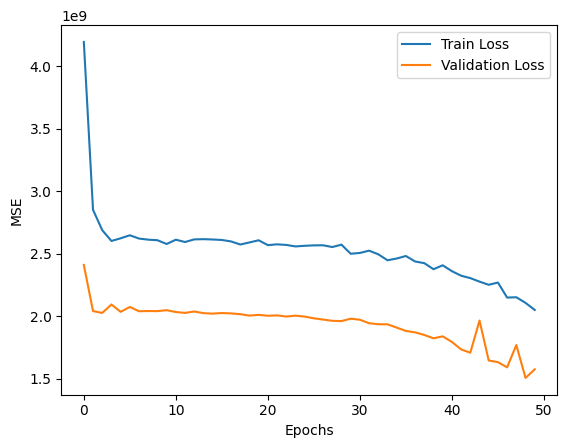

In [27]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()


In [28]:
from sklearn import metrics

predicted = model.predict(X_test)

print("Mean Absolute Error    : ", metrics.mean_absolute_error(y_test, predicted))  
print("Mean Squared Error     : ", metrics.mean_squared_error(y_test, predicted))  
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R2 Score               : ", metrics.r2_score(y_test, predicted))

print("-----------------------------------------------------------------------")

df_data = pd.DataFrame({
    "Actual": y_test.values.flatten(), 
    "Predicted": predicted.flatten()
})
print(df_data.head(15))

print("-----------------------------------------------------------------------")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Absolute Error    :  18218.376953125
Mean Squared Error     :  1480845312.0
Root Mean Squared Error:  38481.75297462422
R2 Score               :  0.487697958946228
-----------------------------------------------------------------------
    Actual      Predicted
0    12000   38159.535156
1    32000   13837.070312
2    15000    9675.690430
3    29000   78919.218750
4     8000    9966.250977
5    40000    9079.573242
6    34999   25755.787109
7    45000   82962.750000
8   150000   67379.664062
9    15000   25111.605469
10   14000   27894.041016
11    9000    4873.046387
12   65000   54886.996094
13    9000   11627.723633
14  300000  147321.187500
-----------------------------------------------------------------------
